## Pearson correlation

In [1]:
alice = [1,2,3,4,2,4]
ramu = [3,3,1,5,1,3]

In [25]:
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
pearsonr(alice, ramu) 

PearsonRResult(statistic=0.36563621206356534, pvalue=0.4759866051709333)

In [5]:
from sklearn.datasets import make_blobs 

In [11]:
X, y = make_blobs(n_samples=200, centers=3,cluster_std=0.60, random_state=0)
X.shape, y.shape 

((200, 2), (200,))

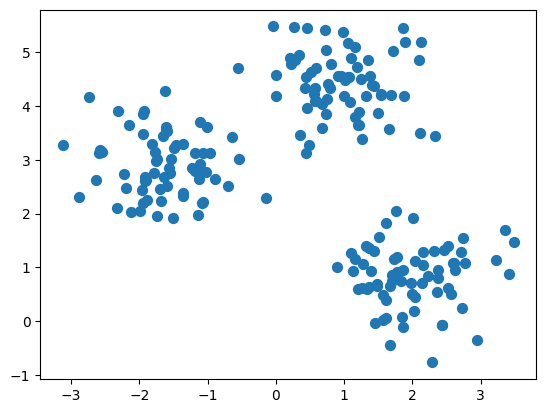

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [13]:
from sklearn.cluster import KMeans 

In [14]:
kmeans = KMeans(n_clusters=3, init='random', max_iter = 10)
kmeans 

KMeans(init='random', max_iter=10, n_clusters=3)

In [15]:
kmeans.fit(X) 

KMeans(init='random', max_iter=10, n_clusters=3)

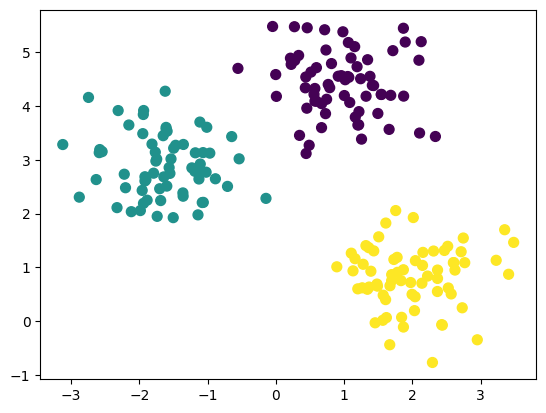

In [18]:
y_pred = kmeans.predict(X) 
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

In [26]:
np.unique(y_pred), X.shape 

(array([0, 1, 2]), (200, 2))

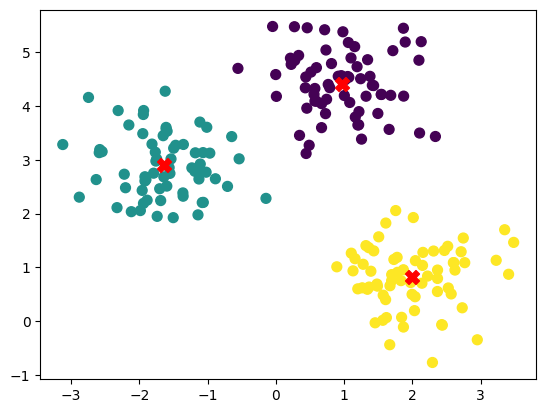

In [29]:
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s=100, marker='X')

In [30]:
from sklearn.neighbors import KDTree 


In [31]:
tree = KDTree(X)

In [33]:
distances, _ = tree.query(X, k=2) 
distances.shape

(200, 2)

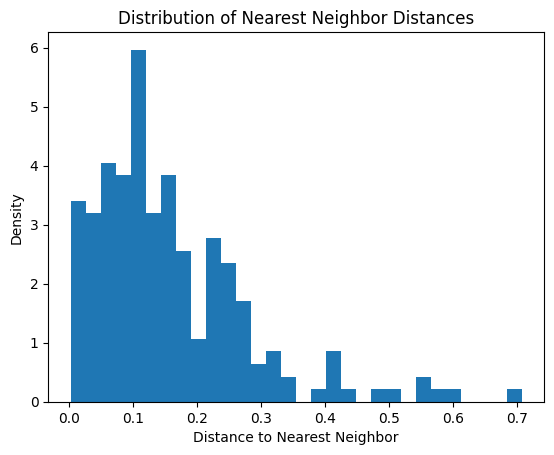

In [34]:
plt.hist(distances[:, 1], bins=30, density=True)  # distances[:, 1] to exclude self-distance
plt.xlabel('Distance to Nearest Neighbor')
plt.ylabel('Density')
plt.title('Distribution of Nearest Neighbor Distances')
plt.show()

## Dimensionality Reduction 

- Feature Selection
- Feature Extraction 

## PCA 

- takes m dimensional input
- creates a set of n (m>>n) linearly uncorrelated variables
    - called principal components
- such that n dimensions lose as little variance as possible due to loss of dimensions

- get the first principal component such that it holds the maximum variance

- to categorize the dependent and independent variables in the data 

In [36]:
import pandas as pd 

In [37]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
names=['sepal_length','sepal_width','petal_length','petal_width','class'])
#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# scaling the data to a standard scale 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris 

In [43]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the features
X_standardized = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

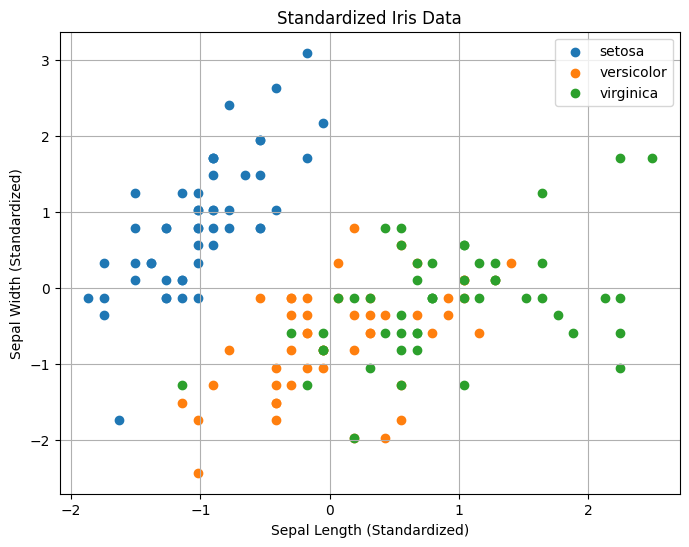

In [46]:
plt.figure(figsize=(8, 6))
for class_label in np.unique(iris.target):
    plt.scatter(X_standardized[iris.target == class_label]['sepal length (cm)'],
                X_standardized[iris.target == class_label]['sepal width (cm)'],
                label=iris.target_names[class_label])
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('Standardized Iris Data')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

In [54]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

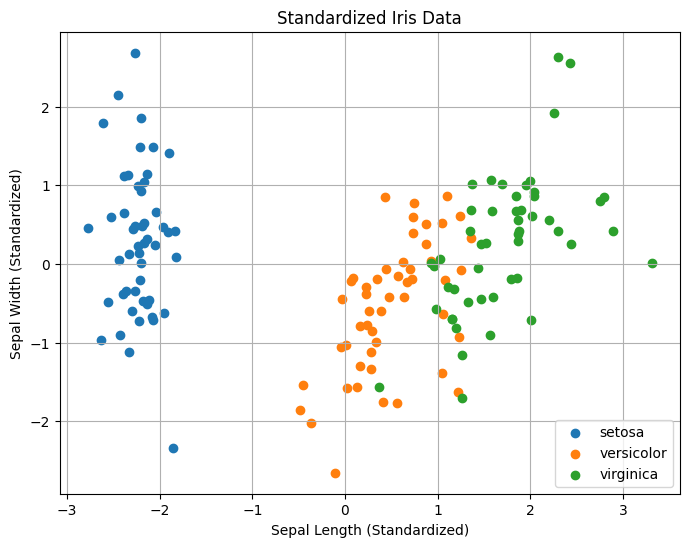

In [55]:
plt.figure(figsize=(8, 6))
for class_label in np.unique(iris.target):
    plt.scatter(X_pca[iris.target == class_label][:, 0],
                X_pca[iris.target == class_label][:, 1],
                label=iris.target_names[class_label])
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('Standardized Iris Data')
plt.legend()
plt.grid(True)
plt.show()

## SVD ( Singular Value Decomposition) 

- takes n dimensional dataset as input
- constructs an (n-1) dimensional hyperplane
    - in such a way there is maximum separation of classes 

In [56]:
from scipy.linalg import svd 

In [65]:
U, s, vT = svd(X, full_matrices=False) 
U.shape, s.shape, vT.shape  

((150, 4), (4,), (4, 4))

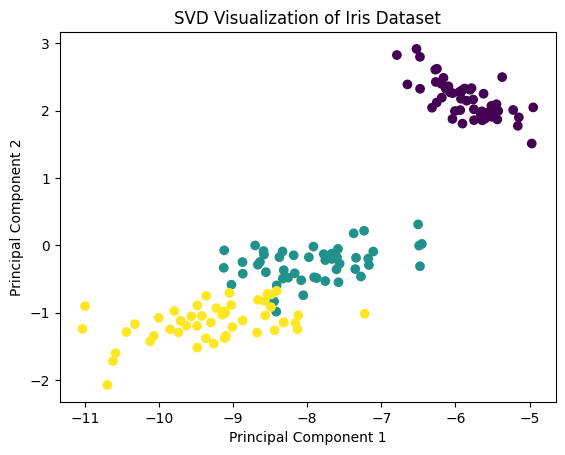

In [66]:
PC = np.dot(X, vT.T[:, :2])

# Plot the reduced data
plt.scatter(PC[:, 0], PC[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVD Visualization of Iris Dataset')
plt.show()